<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# 5.2 Loading data from a file

In the previous notebook you used numpy to handle vectors of data, and plotted data with matplotlib. The data came either from calculations in Python or from (short) lists which you entered in the notebook. If you need to work with larger amounts of data that becomes inconvenient. Then it's useful to load data from a file.

This notebook uses a file called `rico.txt`. You can open the file in a different tab by clicking the download button ({fa}`download`) in the top right and selecting "rico dataset".

```{custom_download_link} ../data/rico.txt
:text: "rico dataset"
:replace_default: "True"
```

In [3]:
import numpy as np
from pathlib import Path

rico_dataset_path = Path.cwd().parent / "data" / "rico.txt"

rico = np.loadtxt(rico_dataset_path)

What did we just load?

In [7]:
print(type(rico))
print(rico.shape)

<class 'numpy.ndarray'>
(126, 6)


Let's see what data it contains.

In [8]:
print(rico[:10,:]) # select first 10 rows, all columns

[[ 2.0000e+01  2.9790e+02  1.5941e-02 -9.8600e+00 -3.8000e+00  9.9500e-01]
 [ 6.0000e+01  2.9790e+02  1.5822e-02 -9.7800e+00 -3.8000e+00  9.8500e-01]
 [ 1.0000e+02  2.9790e+02  1.5703e-02 -9.7000e+00 -3.8000e+00  9.7500e-01]
 [ 1.4000e+02  2.9790e+02  1.5584e-02 -9.6200e+00 -3.8000e+00  9.6500e-01]
 [ 1.8000e+02  2.9790e+02  1.5465e-02 -9.5400e+00 -3.8000e+00  9.5500e-01]
 [ 2.2000e+02  2.9790e+02  1.5346e-02 -9.4600e+00 -3.8000e+00  9.4500e-01]
 [ 2.6000e+02  2.9790e+02  1.5227e-02 -9.3800e+00 -3.8000e+00  9.3500e-01]
 [ 3.0000e+02  2.9790e+02  1.5108e-02 -9.3000e+00 -3.8000e+00  9.2500e-01]
 [ 3.4000e+02  2.9790e+02  1.4989e-02 -9.2200e+00 -3.8000e+00  9.1500e-01]
 [ 3.8000e+02  2.9790e+02  1.4870e-02 -9.1400e+00 -3.8000e+00  9.0500e-01]]


* open the file `rico.txt` in a _text editor_. For example Notepad (basic, comes with Windows),
[Notepad++](https://notepad-plus-plus.org/) (nice, free, open source). Microsoft Word might work too, but is not as nice for working with these _plain text_ files.

* look at the top of the file. You will see two lines starting with `#` followed by lines of numbers.

* lines starting with `#` are considered as comments, and are ignored by Numpy.
Those lines describe the columns of the file.

* the following lines with numbers are loaded into the numpy array. You can compare the first few rows from the file with the array content you printed above.

As you probably know, numbers like `2.0000e+01` are written in scientific notation, this one means `2 * 10**1 = 20`


### What does it mean?

The file `rico.txt` describe atmospheric conditions (like temperature, humidity, wind speed) as a function of height above the surface. The file is part of the input to the [DALES](https://github.com/dalesteam/dales) model, for running a specific simulation called [RICO](https://doi.org/10.1029/2011MS000056) (Rain In Cumulus over Ocean, vanZanten et al 2011).  


The two first lines of the file give a hint of what the columns mean:
```
#  input file Profiles - RICO Trade Cu Period (12/16-01/08)
#  height(m)    thl(K)          q_t (kg/kg)      u(m/s)          v(m/s)         TKE_init (m/s)
```

Some more explanation of the columns, and their number (starting from 0, since that's how Python numbers them): 
```
0 height    height above the surface (m)
1 thl       liquid water potential temperature (K), a kind of temperature
2 qt        specific humidity (kg/kg) - amount of water, kg of water per kg of total air 
3 u         wind speed (m/s) in the eastward direction
4 v         wind speed (m/s) in the northward direction
5 TKE_init  turblent kinetic energy (m/s) - a measure of the amount of turbulence
```



## 5.2.1 Surface and color plots

Next you will learn some more plotting with matplotlib, namely to plot a function of two variables, f(x,y). Either as a 2D image with colors showing the value, or as a surface in 3D where z = f(x,y).  

First try the folloring example showing `np.meshgrid()`. Meshgrid is used to create 2D arrays X and Y, where X contains an x-coordinate and Y contains an y-coordinate.

In [9]:
import matplotlib.pyplot as plt

In [10]:
x = np.linspace(0, 3, 4) # [0, 1, 2, 3]
y = np.linspace(0, 4, 5) # [0, 1, 2, 3, 4]

X,Y = np.meshgrid(x,y)

print('X')
print(X)
print()
print('Y')
print(Y)

X
[[0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]]

Y
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]]


The repeated rows or columns in the meshgrid output may seem redundant, but they are convenient for 
building expressions.

### Surface plot

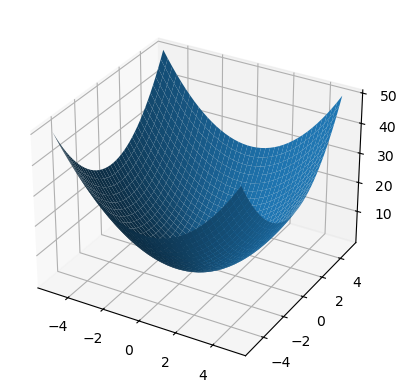

In [12]:
x = np.linspace(-5, 5, 40) # create new coordinate arrays with more points
y = np.linspace(-5, 5, 40) 

X,Y = np.meshgrid(x,y)

# a function to plot
Z = X**2 + Y**2
# Z has the same shape as X and Y
# each element of Z is computed from the corresponding elements of X and Y

ax = plt.axes(projection='3d')

ax.plot_surface(X,Y,Z)

plt.show()

### Color plot

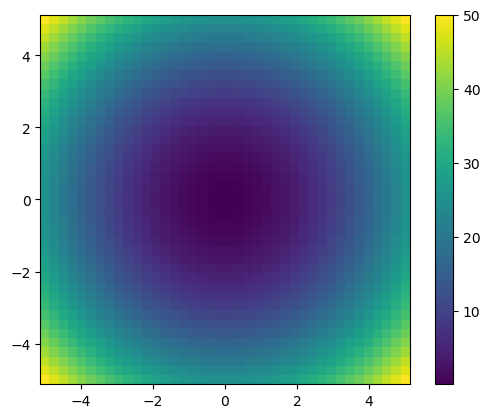

In [13]:
x = np.linspace(-5, 5, 40) # create new coordinate arrays with more points
y = np.linspace(-5, 5, 40) 

X,Y = np.meshgrid(x,y)

# a function to plot
Z = X**2 + Y**2

# optional: set square aspect ratio, meaning that one unit along x and y is equally long
plt.gca().set_aspect('equal')  # gca() stands for get current axis

plt.pcolormesh(X,Y,Z)   # plot Z as function of X and Y, using colors
plt.colorbar()          # shows the color bar

plt.show()